# Benchmark the results cmopared with other methods

In [1]:
import numpy as np
import pandas as pd

import os, sys, tqdm, copy

import tqdm
import tqdm.notebook

import matplotlib.pyplot as plt
import matplotlib

style = [
    # 'seaborn-ticks',
    {
        'figure.dpi': 300,
        'font.size': 12,
        'image.cmap': 'inferno',
        'font.family': 'serif',
        'font.serif': ['Times', 'Times New Roman'] + plt.rcParams['font.serif'],
        'xtick.top': True,
        'xtick.direction': 'in',
        'ytick.right': True,
        'ytick.direction': 'in',
        'mathtext.fontset': 'cm'
        }]
plt.style.use(style)

import scipy.io

In [2]:
# github_dir = '/home/dingshandeng/github/ysoisochrone/'
github_dir = '/Users/dingshandeng/github/ysoisochrone/'

os.chdir(os.path.join(github_dir, 'tests'))
sys.path.append(os.path.join(github_dir))
import ysoisochrone.utils as utils
import ysoisochrone

## Compare the estimates posted on Manara et al. 2021

In [3]:
file_dir_t = os.path.join(github_dir, 'tests', 'data')
df_M2023 = pd.read_table(os.path.join(file_dir_t, 'PP7-Surveys_2022-10-19_PPVII_website.tsv'))

In [4]:
# Exclude those do not have Teff and Lstar
df_prop = df_M2023[[True if num != '--' else False for num in df_M2023['Teff_xs']]]
df_prop.index = np.arange(len(df_prop))
df_prop.loc[:, ['Teff_xs', 'Lstar_xs']]

,Teff_xs,Lstar_xs
0,4060,0.89
1,3415,0.22
2,3125,0.02
3,3060,0.06
4,4900,5.42
...,...,...
544,3900,9.332543008
545,7200,28.84031503
546,10500,295.1209227
547,3190,0.5248074602


In [5]:
# df_prop.loc[:, 'Teff[K]'] = np.array([np.float(num) for num in df_prop.loc[:, 'Teff_xs'].values])
df_prop.loc[:, 'Teff[K]'] = np.array([np.float(num) for num in df_prop.loc[:, 'Teff_HH14'].values])
df_prop.loc[:, 'Luminosity[Lsun]'] = np.array([np.float(num) for num in df_prop.loc[:, 'Lstar_xs'].values])
# df_prop.loc[:, 'Luminosity[Lsun]'] = np.array([np.float(num) for num in df_prop.loc[:, 'Lstar_xs_DR3'].values])

/var/folders/55/fr_v0r1j7q33r0fj9pyy5xfw0000gn/T/ipykernel_73937/579444894.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_prop.loc[:, 'Teff[K]'] = np.array([np.float(num) for num in df_prop.loc[:, 'Teff_HH14'].values])
/Users/dingshandeng/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/var/folders/55/fr_v0r1j7q33r0fj9pyy5xf

In [55]:
# best_logmass_output, best_logage_output = ysoisochrone.bayesian.derive_stellar_mass_age_closest_track(df_prop, model='Baraffe_n_Feiden', verbose=False)

# best_logmass_output, best_logage_output = ysoisochrone.bayesian.derive_stellar_mass_age_closest_track(df_prop, model='Baraffe2015', verbose=False)

best_logmass_output, best_logage_output = ysoisochrone.bayesian.derive_stellar_mass_age_closest_track(df_prop, model='Feiden2016', verbose=False)

  5%|▌         | 30/549 [00:02<00:35, 14.48it/s]/Users/dingshandeng/github/ysoisochrone/ysoisochrone/bayesian.py:605: RuntimeWarning: divide by zero encountered in log10
  c_logL = np.log10(L_this)
 55%|█████▌    | 302/549 [00:21<00:17, 14.48it/s]/Users/dingshandeng/github/ysoisochrone/ysoisochrone/bayesian.py:606: RuntimeWarning: invalid value encountered in log10
  c_logT = np.log10(T_this)
 57%|█████▋    | 314/549 [00:21<00:17, 13.65it/s]/Users/dingshandeng/github/ysoisochrone/ysoisochrone/bayesian.py:605: RuntimeWarning: invalid value encountered in log10
  c_logL = np.log10(L_this)
100%|██████████| 549/549 [00:38<00:00, 14.32it/s]


In [56]:
df_output_mass = pd.DataFrame(np.array(best_logmass_output), columns=['logmass[msolar]'])
df_output_age = pd.DataFrame(np.array(best_logage_output), columns=['logage[yrs]']) 
df_output = pd.concat([df_prop, df_output_mass, df_output_age], axis=1)

df_output.loc[:, 'masses[msolar]'] = 10**df_output.loc[:, 'logmass[msolar]'].values

df_output.loc[:, 'age[Myrs]'] = 10**df_output.loc[:, 'logage[yrs]']/1e6

In [57]:
df_output['M2023_logmass[msolar]'] = np.log10(df_prop['Mstar_PPVII'].values)

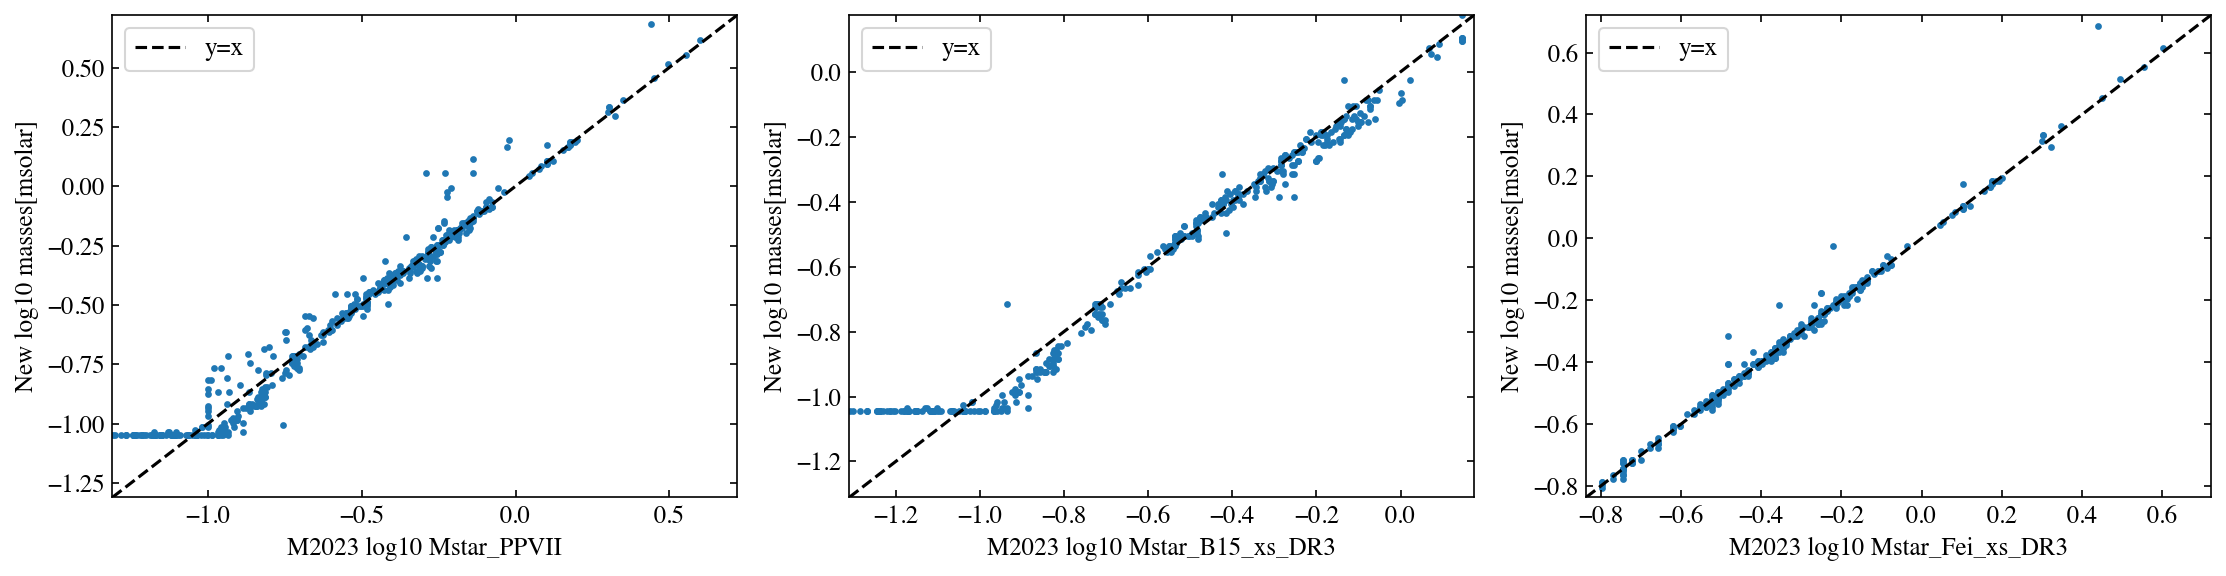

In [58]:
fig = plt.figure(dpi=150, figsize=(15, 4))

for column_t, column_x_t, i_plot in zip(
    ['masses[msolar]', 'masses[msolar]', 'masses[msolar]'],
    ['Mstar_PPVII', 'Mstar_B15_xs_DR3', 'Mstar_Fei_xs_DR3'],
    [1, 2, 3]):
    
    ax = fig.add_subplot(1,3,i_plot)
    ax.set_xlabel('M2023 log10 %s'%(column_x_t))
    ax.set_ylabel('New log10 %s'%(column_t))

    xt = np.log10(df_output['%s'%(column_x_t)].values)
    yt = np.log10(df_output['%s'%(column_t)].values)
    ax.scatter(xt, yt, s=5)

    if 'mass' in column_t:
        line = np.linspace(0.8*np.nanmin(xt), 1.2*np.nanmax(xt), 100)
    elif column_t == 'logage[yrs]':
        line = np.linspace(1.0*np.nanmin(xt), 1.0*np.nanmax(xt), 100)
    else:
        xt_t = xt.copy()
        xt_t[xt_t < 1e-5] = np.nan
        line = np.linspace(1.0*np.nanmin(xt_t), 1.0*np.nanmax(xt_t), 100)
    ax.plot(line, line, c='k', linestyle='--', label='y=x')
    # ax.plot(line, line*10, c='C1', linestyle='-.', label='y=10x')
    # ax.plot(line, line*0.1, c='C2', linestyle='-.', label='y=0.1x')

    ax.set_xlim(np.min(line), np.max(line))
    ax.set_ylim(ax.get_xlim())

    ax.legend()
    
fig.tight_layout()
plt.show()

In [59]:
err_Teff = utils.assign_unc_teff(df_output['Teff[K]'].values)
err_Lumi = utils.assign_unc_lumi(df_output['Luminosity[Lsun]'].values)
df_output['e_Teff[K]'] = err_Teff
df_output['e_Luminosity[Lsun]'] = err_Lumi

/Users/dingshandeng/github/ysoisochrone/ysoisochrone/utils.py:77: RuntimeWarning: invalid value encountered in log10
  err_teff_ar[ii] = unc_linear_from_log(np.log10(T_this), sigma_logT)
/Users/dingshandeng/github/ysoisochrone/ysoisochrone/utils.py:102: RuntimeWarning: divide by zero encountered in log10
  err_lumi_ar[ii] = unc_linear_from_log(np.log10(L_this), sigma_logL)
/Users/dingshandeng/github/ysoisochrone/ysoisochrone/utils.py:102: RuntimeWarning: invalid value encountered in log10
  err_lumi_ar[ii] = unc_linear_from_log(np.log10(L_this), sigma_logL)


In [60]:
# test_columns = ['Mstar_PPVII', 'Mstar_B15_xs_DR3', 'Mstar_Fei_xs_DR3']
# test_columns = ['Mstar_B15_xs_DR3']
test_columns = ['Mstar_Fei_xs_DR3']

column_t = 'masses[msolar]'

logi_all = np.zeros(len(df_output))
for column_x_t in test_columns:
    # column_t = 'logage[yrs]'
    xt = np.log10(df_output['%s'%(column_x_t)].values)
    yt = np.log10(df_output['%s'%(column_t)].values)
    logi_t = (np.abs(xt - yt)/np.abs(xt) > 0.2)
    logi_all = np.logical_or(logi_all, logi_t)

# yt/xt > 1.05
# np.nanmax(yt/xt)
# df_problematic = df_output[yt-xt > 0.05]
print('total number of targets: ', len(df_output))
df_problematic = df_output[logi_all]
print('number of target that has differences:', len(df_problematic))

total number of targets:  549
number of target that has differences: 11


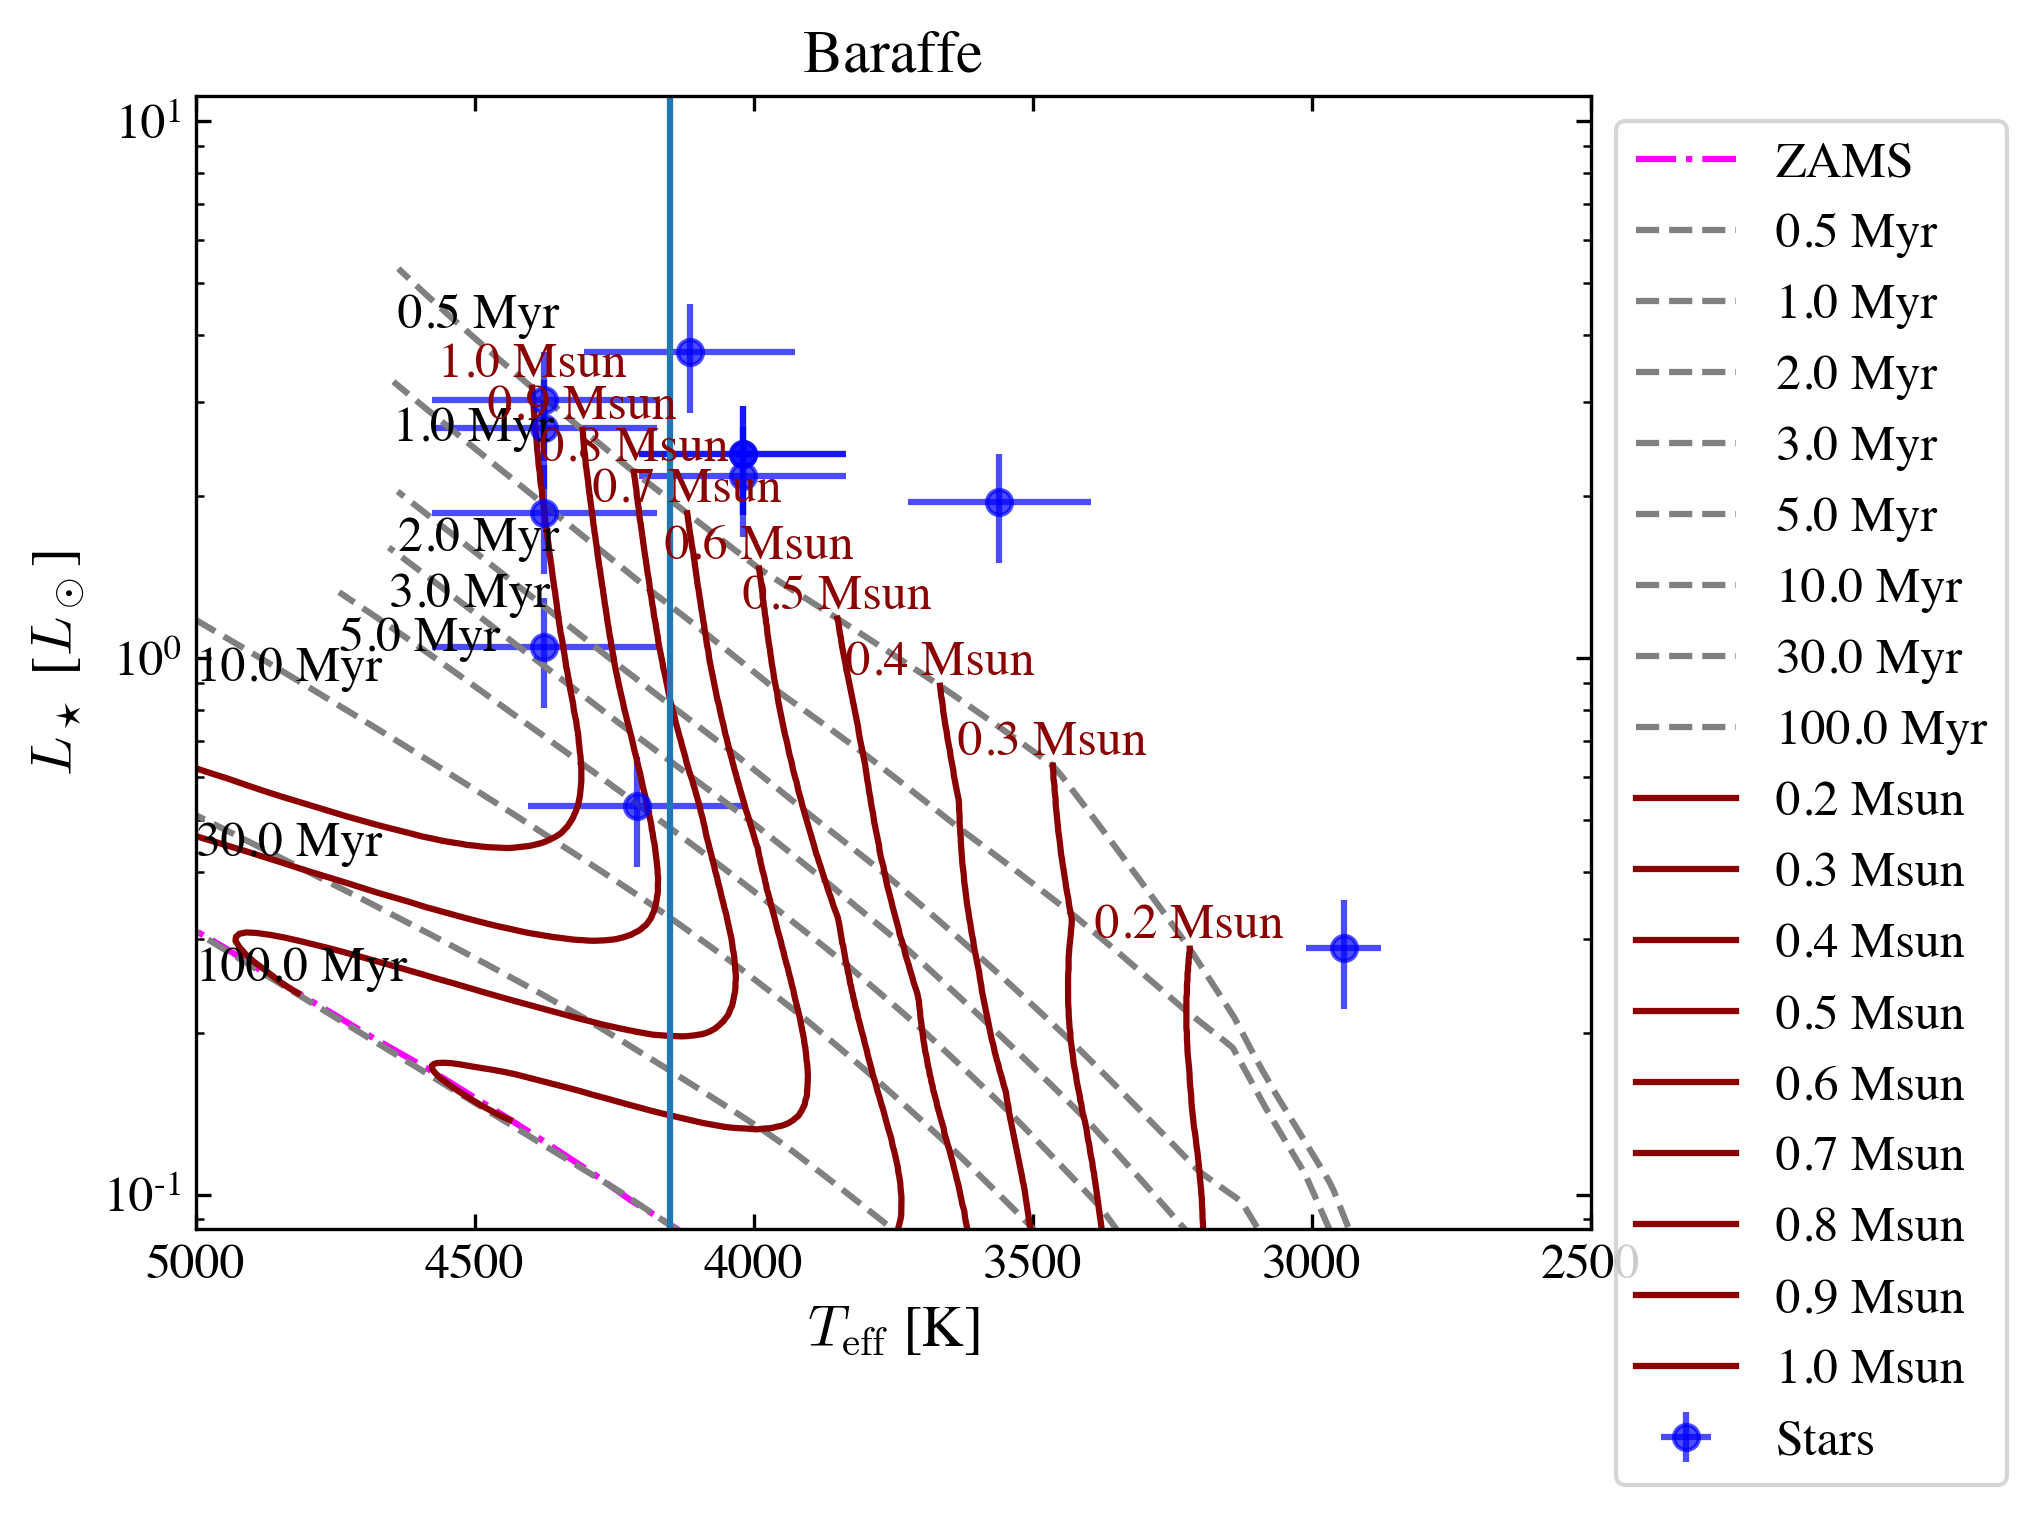

In [48]:
ylim_set_t = [0.05, 500]

isochrone = ysoisochrone.isochrone.Isochrone()

fig, ax = plt.subplots(1,1,figsize=(6, 5))

# isochrone.set_tracks('Feiden2016')
isochrone.set_tracks('Baraffe2015')

ysoisochrone.plotting.plot_hr_diagram(isochrone, df_problematic, ax_set=ax, ages_to_plot=[0.5e6, 1.0e6, 2.0e6, 3.0e6, 5.0e6, 10.0e6, 30.0e6, 100.0e6], xlim_set=[5000, 2500]) # , masses_to_plot=[0.1, 0.2, 0.3], xlim_set=[3500, 2500]) , ylim_set=[0.001, 1.0]

ax.set_title('Baraffe')
# ax.legend(bbox_to_anchor=(-0.15, 1.0), loc='upper right')

ax.axvline(4150)

plt.show()

In [53]:
df_t = copy.deepcopy(df_problematic)
df_t = df_t[df_t['Teff[K]'] > 4150]
df_t.loc[:, ['Source', 'Teff[K]', 'Luminosity[Lsun]', 'Mstar_B15_xs_DR3', 'masses[msolar]']]

,Source,Teff[K],Luminosity[Lsun],Mstar_B15_xs_DR3,masses[msolar]
108,J16141107-2305362,4375.0,1.050000,1.053,1.023293
145,J11075792-7738449,4210.0,0.531000,0.888,0.912011
176,J11103801-7732399,4375.0,2.679000,0.991,0.977237
207,J162536.7-241542,4375.0,1.862087,1.000,0.977237
455,HP Tau,4375.0,3.019952,1.006,0.977237


In [51]:
select_index = []
for idx in df_problematic:
    if idx not in df_t.index:
        select_index.append(idx)
        
df_t2 = df_problematic[select_index]

best_mass_output_assumingage = 10**(ysoisochrone.bayesian.derive_stellar_mass_assuming_age_closest_trk(df_t2, assumed_age=0.5, model='Feiden2016'))

best_mass_output_assumingage

array([0.80212584, 0.66717922, 0.80212584, 0.80212584, 0.31933205,
       0.80212584, 0.52995929, 0.5946241 , 0.52995929, 0.52995929,
       0.09      ])

In [54]:
df_t2.loc[:, ['Source', 'Teff[K]', 'Luminosity[Lsun]', 'Mstar_B15_xs_DR3', 'masses[msolar]']]

,Source,Teff[K],Luminosity[Lsun],Mstar_B15_xs_DR3,masses[msolar]
108,J16141107-2305362,4375.0,1.050000,1.053,1.023293
145,J11075792-7738449,4210.0,0.531000,0.888,0.912011
176,J11103801-7732399,4375.0,2.679000,0.991,0.977237
207,J162536.7-241542,4375.0,1.862087,1.000,0.977237
208,J162539.6-242635,3560.0,1.953417,0.376,0.724436
455,HP Tau,4375.0,3.019952,1.006,0.977237
482,V955 Tau B,4020.0,2.187762,0.670,0.794328
493,DR Tau,4115.0,3.715352,0.734,1.096478
495,UY Aur A,4020.0,2.398833,0.740,0.831764
496,UY Aur B,4020.0,2.398833,0.740,0.831764


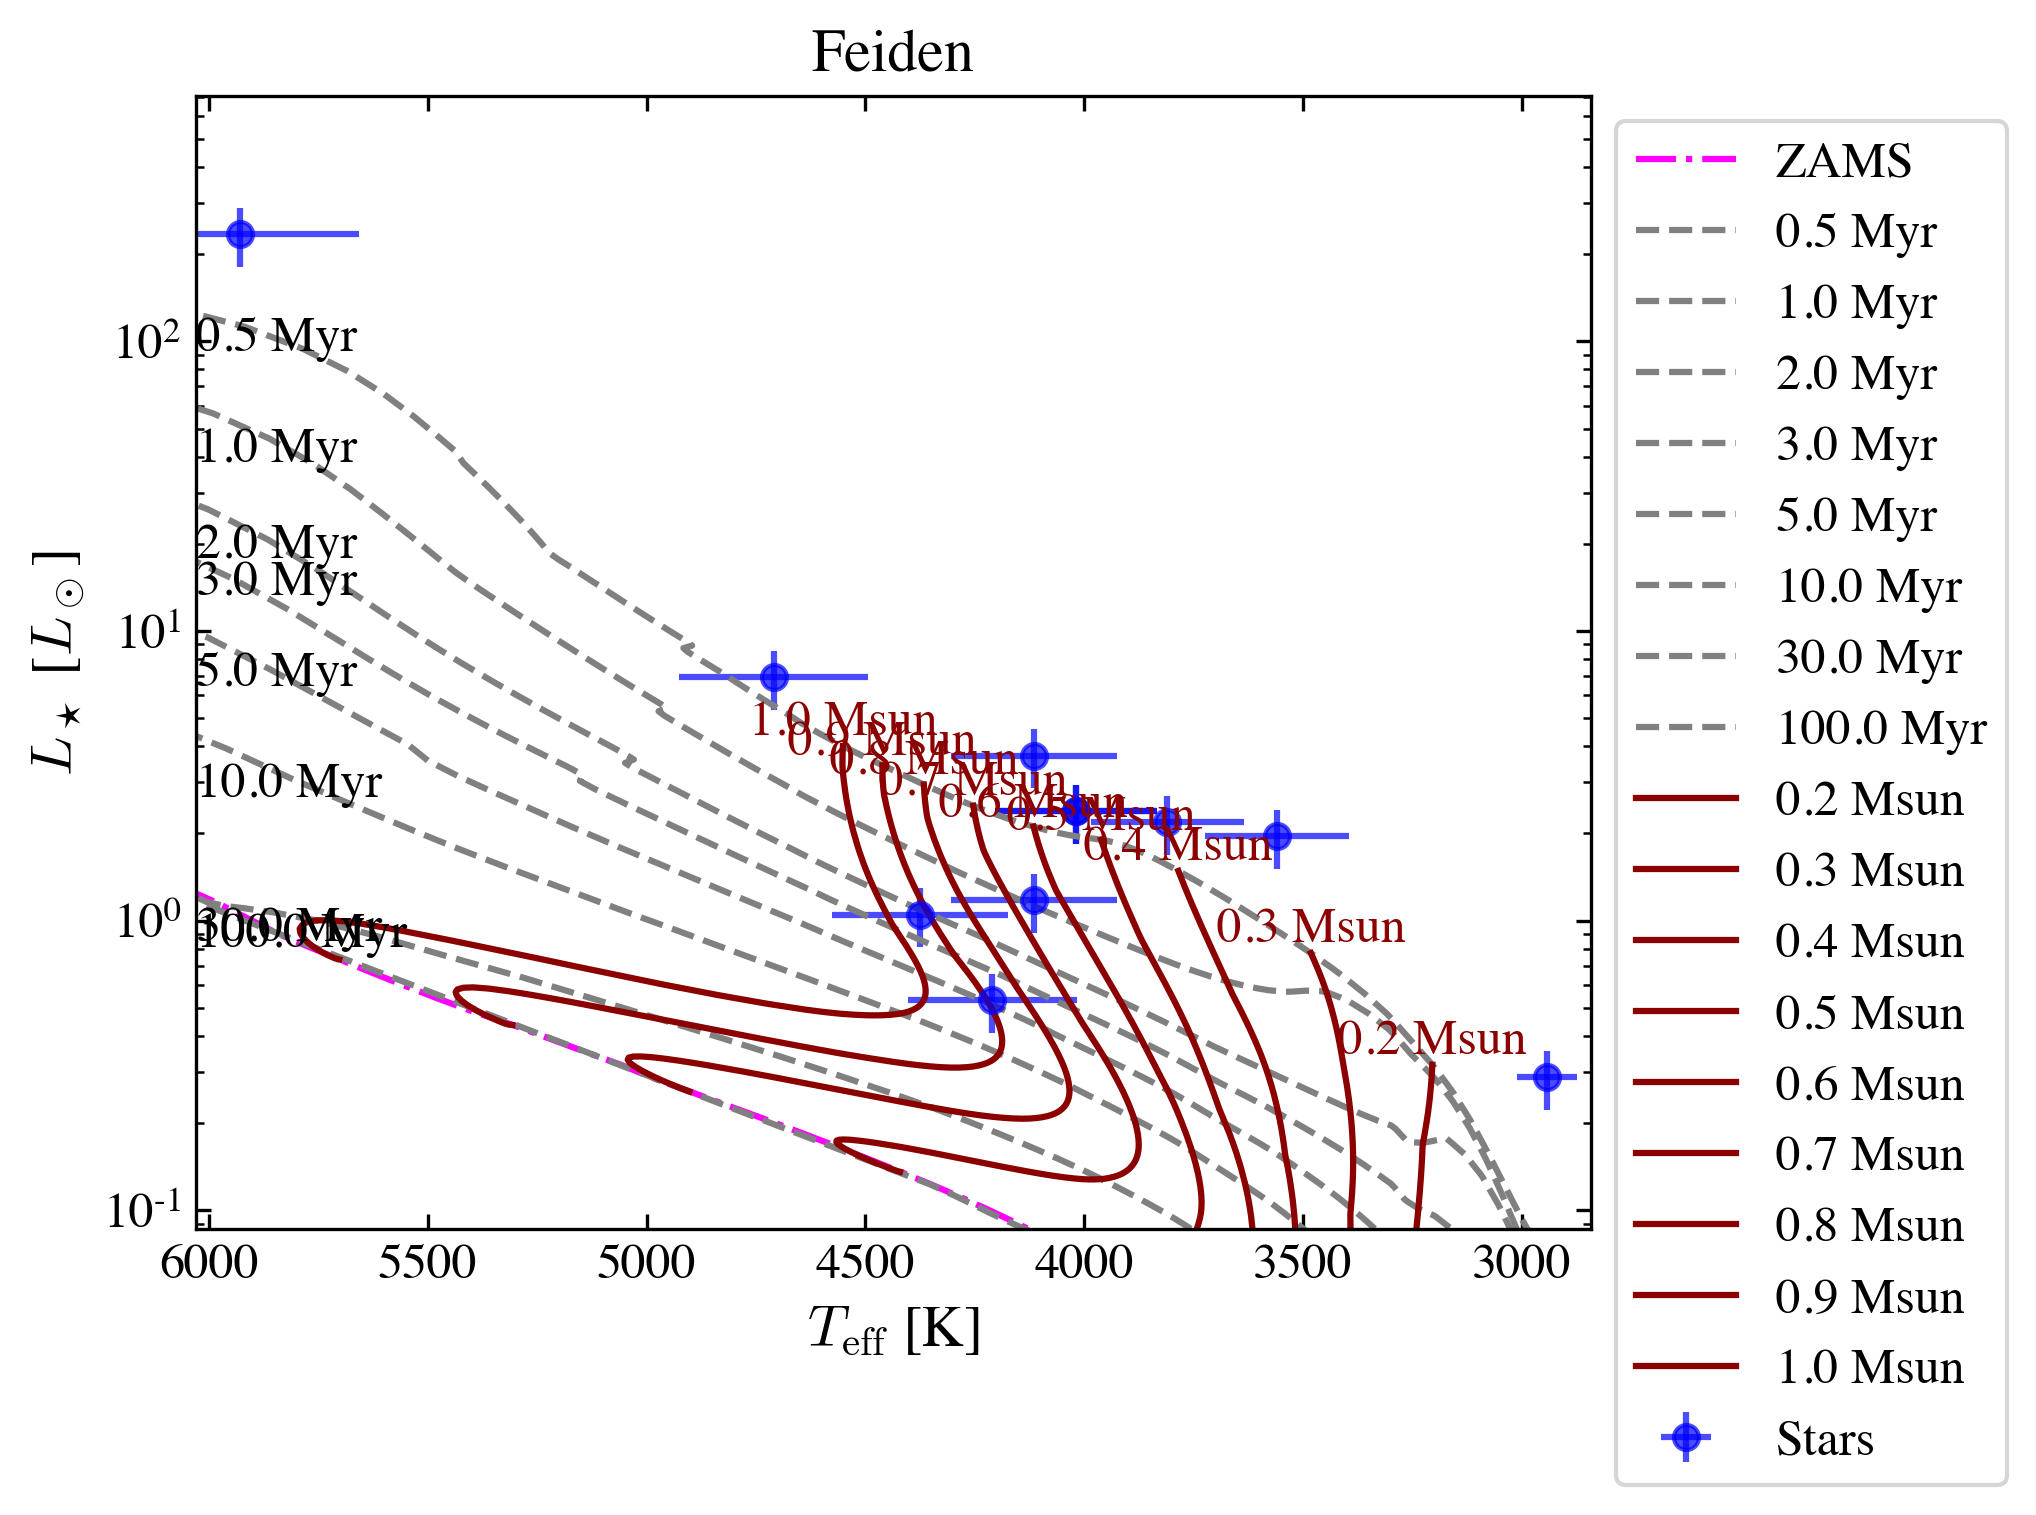

In [61]:
ylim_set_t = [0.05, 500]

isochrone = ysoisochrone.isochrone.Isochrone()

fig, ax = plt.subplots(1,1,figsize=(6, 5))

isochrone.set_tracks('Feiden2016')
# isochrone.set_tracks('Baraffe2015')

ysoisochrone.plotting.plot_hr_diagram(isochrone, df_problematic, ax_set=ax, ages_to_plot=[0.5e6, 1.0e6, 2.0e6, 3.0e6, 5.0e6, 10.0e6, 30.0e6, 100.0e6]) # , masses_to_plot=[0.1, 0.2, 0.3], xlim_set=[3500, 2500]) , ylim_set=[0.001, 1.0]

ax.set_title('Feiden')
# ax.legend(bbox_to_anchor=(-0.15, 1.0), loc='upper right')

plt.show()

In [63]:
df_t = df_problematic[df_problematic['Luminosity[Lsun]'] < 1.5]
df_t = df_t[df_t['Teff[K]'] > 4000]
df_t.loc[:, ['Source', 'Teff[K]', 'Luminosity[Lsun]', 'Mstar_Fei_xs_DR3', 'masses[msolar]']]

,Source,Teff[K],Luminosity[Lsun],Mstar_Fei_xs_DR3,masses[msolar]
108,J16141107-2305362,4375.0,1.050000,0.92,0.942416
145,J11075792-7738449,4210.0,0.531000,0.82,0.879513
497,GM Aur,4115.0,1.174898,0.69,0.637151


In [64]:
select_index = []
for idx in df_problematic:
    if idx not in df_t.index:
        select_index.append(idx)
        
df_t2 = df_problematic[select_index]
df_t2

,Region,Source,2MASS/SSTc2d,RA,Dec,EDR3_plx,EDR3_err_plx,EDR3_dist_pc,EDR3_RUWE,EDR3_Dist_PPVII,...,dist_PPVII,Teff[K],Luminosity[Lsun],logmass[msolar],logage[yrs],masses[msolar],age[Myrs],M2023_logmass[msolar],e_Teff[K],e_Luminosity[Lsun]
108,USco,J16141107-2305362,J16141107-2305362,16:14:11.077,-23:05:36.244,--,--,--,--,142.0,...,145.0,4375.0,1.050000,-0.025757,6.34897,0.942416,2.233418,-0.036212,201.476196,0.241771
145,ChamI,J11075792-7738449,J11075792-7738449,11:07:57.928,-77:38:44.927,5.3821,0.1966,185.80,2.917,191.0,...,190.0,4210.0,0.531000,-0.055757,6.65897,0.879513,4.560054,-0.086186,193.877665,0.122267
208,rOph,J162539.6-242635,J16253958-2426349,16:25:39.600,-24:26:35.000,5.6396,0.3653,177.32,2.575,139.0,...,139.4,3560.0,1.953417,-0.315757,5.69897,0.483329,0.500000,-0.424812,163.944059,0.449791
380,Taurus,RY Tau,J04215740+2826355,04:21:57.410,=+28:26:35.571,7.2349,0.2031,138.22,13.281,141.0,...,140.0,5930.0,234.422881,0.684243,5.69897,4.833286,0.500000,0.439333,273.086592,53.977863
454,Taurus,HQ Tau,J04354733+2250216,04:35:47.336,=+22:50:21.700,6.1955,0.2056,161.41,13.394,141.0,...,140.0,4710.0,6.918310,0.174243,5.70897,1.493628,0.511646,0.103804,216.903516,1.593000
481,Taurus,V955 Tau A,J04420777+2523118,04:42:07.774,=+25:23:11.800,6.5104,0.4047,153.60,15.255,141.0,...,140.0,3810.0,2.187762,-0.215757,5.69897,0.608475,0.500000,-0.356547,175.456984,0.503751
493,Taurus,DR Tau,J04470620+1658428,04:47:06.209,=+16:58:42.810,5.1823,0.0329,192.96,1.868,141.0,...,140.0,4115.0,3.715352,-0.025757,5.69897,0.942416,0.500000,-0.221849,189.502753,0.855491
495,Taurus,UY Aur A,J04514737+3047134,04:51:47.375,=+30:47:13.460,6.5669,0.0372,152.28,2.212,141.0,...,140.0,4020.0,2.398833,-0.175757,5.69897,0.667179,0.500000,-0.251812,185.127841,0.552352
496,Taurus,UY Aur B,J04514737+3047134,04:51:47.375,=+30:47:13.460,6.5669,0.0372,152.28,2.212,141.0,...,140.0,4020.0,2.398833,-0.175757,5.69897,0.667179,0.500000,-0.251812,185.127841,0.552352
497,Taurus,GM Aur,J04551098+3021595,04:55:10.983,=+30:21:59.540,6.3248,0.0490,158.11,2.526,141.0,...,140.0,4115.0,1.174898,-0.195757,5.95897,0.637151,0.909850,-0.161151,189.502753,0.270530


In [65]:
best_mass_output_assumingage = 10**(ysoisochrone.bayesian.derive_stellar_mass_assuming_age_closest_trk(df_t2, assumed_age=0.5, model='Feiden2016'))

best_mass_output_assumingage

array([0.80212584, 0.66717922, 0.31933205, 4.5106851 , 1.27128379,
       0.41137937, 0.5946241 , 0.52995929, 0.52995929, 0.5946241 ,
       0.09      ])

In [66]:
df_t2.loc[:, ['Source', 'Teff[K]', 'Luminosity[Lsun]', 'Mstar_Fei_xs_DR3', 'masses[msolar]']]

,Source,Teff[K],Luminosity[Lsun],Mstar_Fei_xs_DR3,masses[msolar]
108,J16141107-2305362,4375.0,1.050000,0.92,0.942416
145,J11075792-7738449,4210.0,0.531000,0.82,0.879513
208,J162539.6-242635,3560.0,1.953417,0.33,0.483329
380,RY Tau,5930.0,234.422881,2.75,4.833286
454,HQ Tau,4710.0,6.918310,1.27,1.493628
481,V955 Tau A,3810.0,2.187762,0.44,0.608475
493,DR Tau,4115.0,3.715352,0.60,0.942416
495,UY Aur A,4020.0,2.398833,0.56,0.667179
496,UY Aur B,4020.0,2.398833,0.56,0.667179
497,GM Aur,4115.0,1.174898,0.69,0.637151


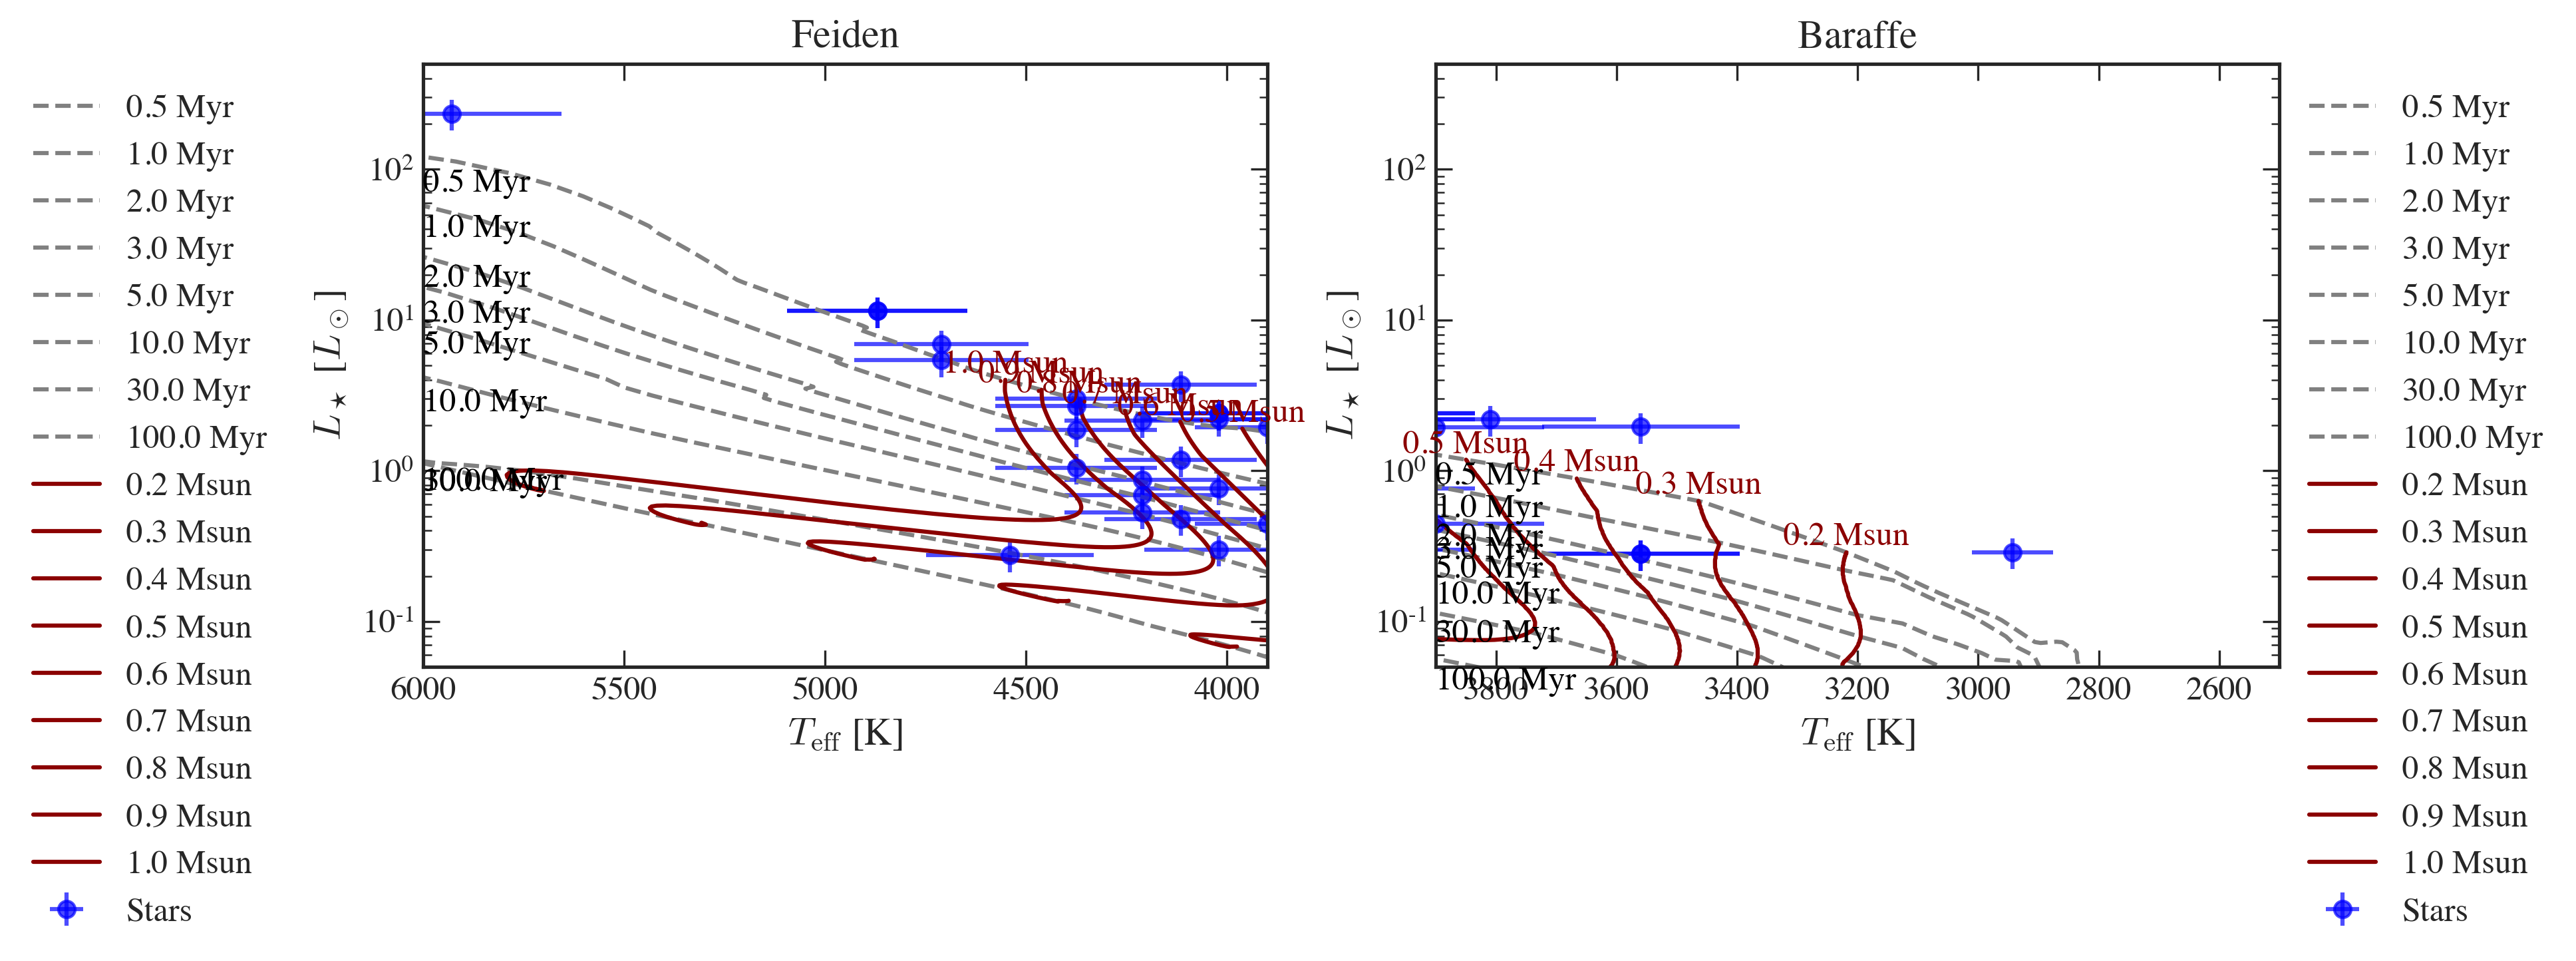

In [25]:
ylim_set_t = [0.05, 500]

isochrone = ysoisochrone.isochrone.Isochrone()

fig, axes = plt.subplots(1,2,figsize=(12, 4))

isochrone.set_tracks('Feiden2016')
# isochrone.set_tracks('Baraffe2015')

ysoisochrone.plotting.plot_hr_diagram(isochrone, df_problematic, ax_set=axes[0], ages_to_plot=[0.5e6, 1.0e6, 2.0e6, 3.0e6, 5.0e6, 10.0e6, 30.0e6, 100.0e6], xlim_set=[6000, 3900], ylim_set=ylim_set_t) # , masses_to_plot=[0.1, 0.2, 0.3], xlim_set=[3500, 2500]) , ylim_set=[0.001, 1.0]

axes[0].set_title('Feiden')
axes[0].legend(bbox_to_anchor=(-0.15, 1.0), loc='upper right')

isochrone.set_tracks('Baraffe2015')

ysoisochrone.plotting.plot_hr_diagram(isochrone, df_problematic, ax_set=axes[1], ages_to_plot=[0.5e6, 1.0e6, 2.0e6, 3.0e6, 5.0e6, 10.0e6, 30.0e6, 100.0e6], xlim_set=[3900, 2500], ylim_set=ylim_set_t) # , masses_to_plot=[0.1, 0.2, 0.3], xlim_set=[3500, 2500]) 

axes[1].set_title('Baraffe')
# axes[0].legend(bbox_to_anchor=(-0.15, 1.0), loc='upper right')

plt.show()